In [33]:
# import section

import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.preprocessing import OneHotEncoder, Normalizer, Binarizer
from sklearn.compose import make_column_transformer

In [101]:
data_path = './data/'
train_accounts = pd.read_csv(data_path + 'train_accounts.csv')
test_accounts = pd.read_csv(data_path + 'test_accounts.csv')

c:\users\yama\docume~1\datapr~1\dh_yyr\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
train_accounts.head()

,account_id,account_name,created_at,plan_id,trial_start,churn_date,churn_reason,time_diff,region,country,subscription_started_at,paying,has_logo,device,os,browser,collection_21_days,company_size,payment_currency,max_team_size,min_team_size,industry,utm_cluster_id,mrr,user_goal,user_description,team_size,lead_score
0,1.0,"Gardner, Barron and Keller",2019-01-01 00:01:15,NaN,2019-01-01 00:01:15,NaN,NaN,11.0,New South Wales,AU,NaN,0,1,desktop,windows,microsoft edge,0,NaN,AUD,5.0,2.0,NaN,orders,NaN,NaN,NaN,NaN,0
1,2.0,Dunn Ltd,2019-01-01 00:01:52,NaN,2019-01-01 00:01:52,NaN,NaN,NaN,New Jersey,US,NaN,0,1,mobile,ios,NaN,0,NaN,USD,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3.0,Boone Inc,2019-01-01 00:03:12,NaN,2019-01-01 00:03:12,NaN,NaN,-6.0,Louisiana,US,NaN,0,1,desktop,windows,chrome,0,NaN,USD,1.0,1.0,Other,todos,NaN,NaN,NaN,1,0
3,4.0,"Christian, Carroll and Davis",2019-01-01 00:04:11,NaN,2019-01-01 00:04:11,NaN,NaN,NaN,Tel Aviv,IL,NaN,0,1,mobile,android,NaN,0,NaN,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5.0,Brooks-Oliver,2019-01-01 00:04:21,NaN,2019-04-04 11:09:12,NaN,NaN,-5.0,North Carolina,US,NaN,0,1,desktop,chrome_os,chrome,0,NaN,USD,1.0,1.0,Design,todos,NaN,NaN,NaN,1,0


In [36]:
test_accounts.head()

,account_id,account_name,created_at,plan_id,trial_start,churn_date,churn_reason,time_diff,region,country,subscription_started_at,paying,has_logo,device,os,browser,collection_21_days,company_size,payment_currency,max_team_size,min_team_size,industry,utm_cluster_id,mrr,user_goal,user_description,team_size
0,7.0,Phillips-Mendoza,2019-01-01 00:04:31,NaN,2019-01-01 00:04:31,NaN,NaN,2.00,Tel Aviv,IL,NaN,0,1,desktop,windows,chrome,0,NaN,USD,1.0,1.0,Business Owner,orders,NaN,NaN,NaN,1-1
1,44.0,Peterson-Torres,2019-01-01 00:34:55,NaN,2019-01-01 00:34:55,NaN,NaN,-5.00,Quintana Roo,MX,NaN,0,1,desktop,mac,chrome,0,NaN,USD,5.0,2.0,Business Development,todos,NaN,NaN,NaN,2-5
2,45.0,Small-Robinson,2019-01-01 00:35:38,NaN,2019-01-01 00:35:38,NaN,NaN,13.75,Central,FJ,NaN,0,1,desktop,windows,chrome,0,NaN,USD,1.0,1.0,Business Owner,client_projects,NaN,NaN,NaN,1-1
3,46.0,"Herrera, Smith and Singh",2019-01-01 00:36:19,NaN,2019-01-01 00:36:19,NaN,NaN,-8.00,Texas,US,NaN,0,1,desktop,windows,microsoft edge,0,NaN,USD,1.0,1.0,Administrative,client_projects,NaN,NaN,NaN,1
4,53.0,Lopez LLC,2019-01-01 00:39:39,NaN,2019-02-07 21:36:57,NaN,NaN,-5.00,South Carolina,US,NaN,0,1,desktop,mac,safari,0,NaN,USD,1.0,1.0,Business Owner,todos,NaN,NaN,NaN,1-1


In [39]:
# We map our features into different types
categorical_features = ['os', 'plan_id', 'browser', 'payment_curency', 'device']

normalized_features = ['collection_21_days', 'mrr']

binary_features = []

untouched_features = ['paying']

target = ['lead_score']

# And create a column transformer to handle the manipulation for us
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (Normalizer(), normalized_features),
    (Binarizer(), binary_features)
)

In [48]:
# Getting only the relevant features from the dataset
dataset_train = train_accounts[categorical_features + normalized_features + binary_features + untouched_features + target]
dataset_test = test_accounts[categorical_features + normalized_features + binary_features + untouched_features]

# Filling empty values with default values 
def fill_empty_values(dataset):
    dataset.loc[:,categorical_features] = dataset[categorical_features].fillna('')
    dataset.loc[:,normalized_features + binary_features + untouched_features] = dataset[normalized_features + binary_features + untouched_features].fillna(0)
    return dataset

dataset_train = fill_empty_values(dataset_train)
dataset_test = fill_empty_values(dataset_test)

In [58]:
# We fit our column transformer on both the train and the test sets
concatenated = pd.concat([dataset_train, dataset_test])
preprocess.fit(concatenated)

# We use transform to finally manipulate the features of our training set
dataset_train = dataset_train[concatenated.columns]
x = preprocess.transform(dataset_train)

# Seperating the label
y = dataset_train.pop('lead_score')

c:\users\yama\docume~1\datapr~1\dh_yyr\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [149]:
time_between_created_trial = pd.to_datetime(train_accounts['trial_start']) - pd.to_datetime(train_accounts['created_at'])
time_between_created_subscription = pd.to_datetime(train_accounts['subscription_started_at']) - pd.to_datetime(train_accounts['created_at'])
time_between_trial_subscription = pd.to_datetime(train_accounts['subscription_started_at']) - pd.to_datetime(train_accounts['trial_start'])
from datetime import datetime
time_between_now_trial = datetime.now() - pd.to_datetime(train_accounts['trial_start'])
time_between_now_subscription = datetime.now() - pd.to_datetime(train_accounts['subscription_started_at'])
time_between_now_created = datetime.now() - pd.to_datetime(train_accounts['created_at'])

In [150]:
train_accounts = train_accounts.assign(created_trial_delta=time_between_created_trail.apply(lambda x: (x.seconds//3600)))
train_accounts = train_accounts.assign(created_subscription_delta=time_between_created_subscription.apply(lambda x: (x.seconds//3600)))
train_accounts = train_accounts.assign(trial_subscription_delta=time_between_trial_subscription.apply(lambda x: (x.seconds//3600)))
train_accounts = train_accounts.assign(now_trial_delta=time_between_now_trial.apply(lambda x: (x.seconds//3600)))
train_accounts = train_accounts.assign(now_subscription_delta=time_between_now_subscription.apply(lambda x: (x.seconds//3600)))
train_accounts = train_accounts.assign(now_created_delta=time_between_now_created.apply(lambda x: (x.seconds//3600)))

In [151]:
train_accounts['is_subscription'] = (train_accounts.subscription_started_at.isna()).astype(int)

In [152]:
train_accounts.select_dtypes('number')

,account_id,plan_id,churn_reason,time_diff,paying,has_logo,collection_21_days,company_size,max_team_size,min_team_size,mrr,lead_score,created_trial_delta,created_subscription_delta,trial_subscription_delta,is_subscription,now_trial_delta,now_subscription_delta,now_created_delta
0,1.0,NaN,NaN,11.0,0,1,0,NaN,5.0,2.0,NaN,0,0,NaN,NaN,1,14,NaN,14
1,2.0,NaN,NaN,NaN,0,1,0,NaN,5.0,2.0,NaN,0,0,NaN,NaN,1,14,NaN,14
2,3.0,NaN,NaN,-6.0,0,1,0,NaN,1.0,1.0,NaN,0,0,NaN,NaN,1,14,NaN,14
3,4.0,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,14,NaN,14
4,5.0,NaN,NaN,-5.0,0,1,0,NaN,1.0,1.0,NaN,0,11,NaN,NaN,1,3,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361973,1433655.0,NaN,NaN,-4.0,0,1,0,270.0,1.0,1.0,NaN,0,0,NaN,NaN,1,14,NaN,14
1361974,1433656.0,NaN,NaN,-4.0,0,1,0,NaN,5.0,2.0,NaN,0,0,NaN,NaN,1,14,NaN,14
1361975,1433657.0,NaN,NaN,NaN,0,1,0,NaN,5.0,2.0,NaN,0,0,NaN,NaN,1,14,NaN,14
1361976,1433658.0,NaN,NaN,10.0,0,1,0,NaN,1.0,1.0,NaN,0,0,NaN,NaN,1,14,NaN,14


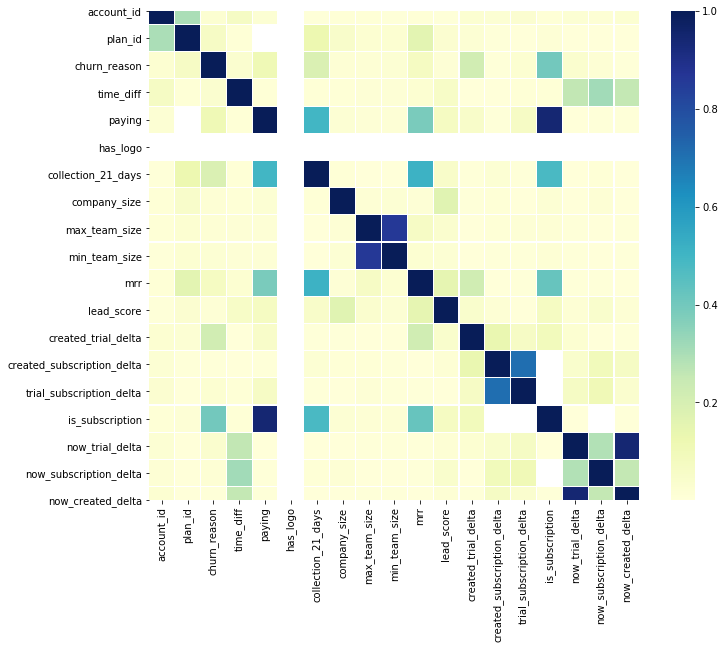

In [155]:
corrmat = train_accounts.select_dtypes('number').corr()
f, ax = plt.subplots(figsize = (11,9))
sns.heatmap(abs(corrmat), ax=ax, cmap='YlGnBu', linewidths= 0.1)

In [76]:
train_accounts.head()

,account_id,account_name,created_at,plan_id,trial_start,churn_date,churn_reason,time_diff,region,country,subscription_started_at,paying,has_logo,device,os,browser,collection_21_days,company_size,payment_currency,max_team_size,min_team_size,industry,utm_cluster_id,mrr,user_goal,user_description,team_size,lead_score,created_trial_delta,created_subscription_delta
0,1.0,"Gardner, Barron and Keller",2019-01-01 00:01:15,NaN,2019-01-01 00:01:15,NaN,NaN,11.0,New South Wales,AU,NaN,0,1,desktop,windows,microsoft edge,0,NaN,AUD,5.0,2.0,NaN,orders,NaN,NaN,NaN,NaN,0,0,NaN
1,2.0,Dunn Ltd,2019-01-01 00:01:52,NaN,2019-01-01 00:01:52,NaN,NaN,NaN,New Jersey,US,NaN,0,1,mobile,ios,NaN,0,NaN,USD,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2,3.0,Boone Inc,2019-01-01 00:03:12,NaN,2019-01-01 00:03:12,NaN,NaN,-6.0,Louisiana,US,NaN,0,1,desktop,windows,chrome,0,NaN,USD,1.0,1.0,Other,todos,NaN,NaN,NaN,1,0,0,NaN
3,4.0,"Christian, Carroll and Davis",2019-01-01 00:04:11,NaN,2019-01-01 00:04:11,NaN,NaN,NaN,Tel Aviv,IL,NaN,0,1,mobile,android,NaN,0,NaN,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
4,5.0,Brooks-Oliver,2019-01-01 00:04:21,NaN,2019-04-04 11:09:12,NaN,NaN,-5.0,North Carolina,US,NaN,0,1,desktop,chrome_os,chrome,0,NaN,USD,1.0,1.0,Design,todos,NaN,NaN,NaN,1,0,11,NaN


In [107]:
train_accounts.subscription_started_at.value_counts()

2019-05-21 15:53:21    3
2019-04-15 07:10:17    2
2019-06-21 08:56:56    2
2019-02-11 22:28:07    2
2019-05-15 11:47:27    2
                      ..
2019-06-11 14:44:14    1
2019-05-20 16:39:32    1
2019-06-30 09:16:34    1
2019-04-09 10:52:34    1
2019-07-02 21:16:32    1
Name: subscription_started_at, Length: 32124, dtype: int64

In [111]:
train_accounts[train_accounts.subscription_started_at.isna()]

,account_id,account_name,created_at,plan_id,trial_start,churn_date,churn_reason,time_diff,region,country,subscription_started_at,paying,has_logo,device,os,browser,collection_21_days,company_size,payment_currency,max_team_size,min_team_size,industry,utm_cluster_id,mrr,user_goal,user_description,team_size,lead_score,created_trial_delta,created_subscription_delta,trial_subscription_delta,is_subscription
0,1.0,"Gardner, Barron and Keller",2019-01-01 00:01:15,NaN,2019-01-01 00:01:15,NaN,NaN,11.0,New South Wales,AU,NaN,0,1,desktop,windows,microsoft edge,0,NaN,AUD,5.0,2.0,NaN,orders,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0
1,2.0,Dunn Ltd,2019-01-01 00:01:52,NaN,2019-01-01 00:01:52,NaN,NaN,NaN,New Jersey,US,NaN,0,1,mobile,ios,NaN,0,NaN,USD,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0
2,3.0,Boone Inc,2019-01-01 00:03:12,NaN,2019-01-01 00:03:12,NaN,NaN,-6.0,Louisiana,US,NaN,0,1,desktop,windows,chrome,0,NaN,USD,1.0,1.0,Other,todos,NaN,NaN,NaN,1,0,0,NaN,NaN,0
3,4.0,"Christian, Carroll and Davis",2019-01-01 00:04:11,NaN,2019-01-01 00:04:11,NaN,NaN,NaN,Tel Aviv,IL,NaN,0,1,mobile,android,NaN,0,NaN,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0
4,5.0,Brooks-Oliver,2019-01-01 00:04:21,NaN,2019-04-04 11:09:12,NaN,NaN,-5.0,North Carolina,US,NaN,0,1,desktop,chrome_os,chrome,0,NaN,USD,1.0,1.0,Design,todos,NaN,NaN,NaN,1,0,11,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361973,1433655.0,"Henson, Miller and Mitchell",2019-06-30 23:56:27,NaN,2019-06-30 23:56:27,NaN,NaN,-4.0,New York,US,NaN,0,1,desktop,windows,chrome,0,270.0,USD,1.0,1.0,Other,todos,NaN,school,NaN,1-1,0,0,NaN,NaN,0
1361974,1433656.0,Keller and Sons,2019-06-30 23:56:57,NaN,2019-06-30 23:56:57,NaN,NaN,-4.0,Florida,US,NaN,0,1,desktop,windows,microsoft edge,0,NaN,USD,5.0,2.0,Administrative,internal_projects,NaN,work,team_lead,2-5,0,0,NaN,NaN,0
1361975,1433657.0,Anderson PLC,2019-06-30 23:57:35,NaN,2019-06-30 23:57:35,NaN,NaN,NaN,Illinois,US,NaN,0,1,mobile,ios,NaN,0,NaN,USD,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0
1361976,1433658.0,"Davis, Proctor and Ward",2019-06-30 23:57:44,NaN,2019-06-30 23:57:44,NaN,NaN,10.0,New South Wales,AU,NaN,0,1,desktop,mac,chrome,0,NaN,AUD,1.0,1.0,NaN,todos,NaN,school,NaN,1-1,0,0,NaN,NaN,0


In [92]:
train_accounts.subscription_started_at.isna()

0          True
1          True
2          True
3          True
4          True
           ... 
1361973    True
1361974    True
1361975    True
1361976    True
1361977    True
Name: subscription_started_at, Length: 1361978, dtype: bool

In [93]:
train_accounts['is_subscription'] = (train_accounts['subscription_started_at'] == 'TRUE').astype(int)

In [94]:
train_accounts

,account_id,account_name,created_at,plan_id,trial_start,churn_date,churn_reason,time_diff,region,country,subscription_started_at,paying,has_logo,device,os,browser,collection_21_days,company_size,payment_currency,max_team_size,min_team_size,industry,utm_cluster_id,mrr,user_goal,user_description,team_size,lead_score,created_trial_delta,created_subscription_delta,trial_subscription_delta
0,1.0,"Gardner, Barron and Keller",2019-01-01 00:01:15,NaN,2019-01-01 00:01:15,NaN,NaN,11.0,New South Wales,AU,0,0,1,desktop,windows,microsoft edge,0,NaN,AUD,5.0,2.0,NaN,orders,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,2.0,Dunn Ltd,2019-01-01 00:01:52,NaN,2019-01-01 00:01:52,NaN,NaN,NaN,New Jersey,US,0,0,1,mobile,ios,NaN,0,NaN,USD,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,3.0,Boone Inc,2019-01-01 00:03:12,NaN,2019-01-01 00:03:12,NaN,NaN,-6.0,Louisiana,US,0,0,1,desktop,windows,chrome,0,NaN,USD,1.0,1.0,Other,todos,NaN,NaN,NaN,1,0,0,NaN,NaN
3,4.0,"Christian, Carroll and Davis",2019-01-01 00:04:11,NaN,2019-01-01 00:04:11,NaN,NaN,NaN,Tel Aviv,IL,0,0,1,mobile,android,NaN,0,NaN,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,5.0,Brooks-Oliver,2019-01-01 00:04:21,NaN,2019-04-04 11:09:12,NaN,NaN,-5.0,North Carolina,US,0,0,1,desktop,chrome_os,chrome,0,NaN,USD,1.0,1.0,Design,todos,NaN,NaN,NaN,1,0,11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361973,1433655.0,"Henson, Miller and Mitchell",2019-06-30 23:56:27,NaN,2019-06-30 23:56:27,NaN,NaN,-4.0,New York,US,0,0,1,desktop,windows,chrome,0,270.0,USD,1.0,1.0,Other,todos,NaN,school,NaN,1-1,0,0,NaN,NaN
1361974,1433656.0,Keller and Sons,2019-06-30 23:56:57,NaN,2019-06-30 23:56:57,NaN,NaN,-4.0,Florida,US,0,0,1,desktop,windows,microsoft edge,0,NaN,USD,5.0,2.0,Administrative,internal_projects,NaN,work,team_lead,2-5,0,0,NaN,NaN
1361975,1433657.0,Anderson PLC,2019-06-30 23:57:35,NaN,2019-06-30 23:57:35,NaN,NaN,NaN,Illinois,US,0,0,1,mobile,ios,NaN,0,NaN,USD,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1361976,1433658.0,"Davis, Proctor and Ward",2019-06-30 23:57:44,NaN,2019-06-30 23:57:44,NaN,NaN,10.0,New South Wales,AU,0,0,1,desktop,mac,chrome,0,NaN,AUD,1.0,1.0,NaN,todos,NaN,school,NaN,1-1,0,0,NaN,NaN


In [116]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d %H:%M:%S")

In [127]:
pd.to_datetime(pd.Series(dt_string)).apply(lambda x: (x.seconds//3600))

AttributeError: 'Timestamp' object has no attribute 'seconds'

In [134]:
time_between_trial_subscription

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
1361973   NaT
1361974   NaT
1361975   NaT
1361976   NaT
1361977   NaT
Length: 1361978, dtype: timedelta64[ns]

In [145]:
(datetime.now() - pd.to_datetime(pd.Series([dt_string, dt_string]))).apply(lambda x: (x.seconds))

0    642
1    642
dtype: int64

In [148]:
time_between_now_subscription

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
1361973   NaT
1361974   NaT
1361975   NaT
1361976   NaT
1361977   NaT
Name: subscription_started_at, Length: 1361978, dtype: timedelta64[ns]